In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(0)
pd.set_option('display.max_columns', None)

In [11]:
start_date = "2024-10-03"
end_date = "2024-10-03"
sampling_rate = "1s"

In [12]:
from data_preprocessing import process_and_combine_data

all_data = process_and_combine_data(start_date, end_date, data_folder="AAPL_data", sampling_rate=sampling_rate)

print(all_data.columns)

all_data.head()

Index(['mid_price_first', 'mid_price_last', 'mid_price_high', 'mid_price_low',
       'mid_price_mean', 'std_mid_price', 'weighted_mid_price_first',
       'weighted_mid_price_last', 'weighted_mid_price_mean', 'last_spread',
       'mean_spread', 'std_spread', 'last_best_bid_price',
       'mean_best_bid_price', 'last_best_ask_price', 'mean_best_ask_price',
       'last_best_bid_size', 'mean_best_bid_size', 'std_best_bid_size',
       'last_best_ask_size', 'mean_best_ask_size', 'std_best_ask_size',
       'mean_second_ask_price', 'mean_second_bid_price', 'mid_price_variation',
       'mid_price_variation_class', 'mean_mid_price_variation',
       'mean_mid_price_variation_class', 'weighted_mid_price_variation',
       'weighted_mid_price_variation_class', 'total_bid_volume',
       'total_ask_volume', 'mean_order_book_imbalance',
       'last_order_book_imbalance', 'total_net_order_flow', 'num_added_orders',
       'num_canceled_orders', 'num_traded_orders', 'order_book_imbalance_5s',


,mid_price_first,mid_price_last,mid_price_high,mid_price_low,mid_price_mean,std_mid_price,weighted_mid_price_first,weighted_mid_price_last,weighted_mid_price_mean,last_spread,mean_spread,std_spread,last_best_bid_price,mean_best_bid_price,last_best_ask_price,mean_best_ask_price,last_best_bid_size,mean_best_bid_size,std_best_bid_size,last_best_ask_size,mean_best_ask_size,std_best_ask_size,mean_second_ask_price,mean_second_bid_price,mid_price_variation,mid_price_variation_class,mean_mid_price_variation,mean_mid_price_variation_class,weighted_mid_price_variation,weighted_mid_price_variation_class,total_bid_volume,total_ask_volume,mean_order_book_imbalance,last_order_book_imbalance,total_net_order_flow,num_added_orders,num_canceled_orders,num_traded_orders,order_book_imbalance_5s,order_flow_5s,bid_volume_variation,ask_volume_variation,bid_price_variation,ask_price_variation,trade_open,trade_close,trade_high,trade_low,ADX_5,ADX_7,ADX_10,DMP_5,DMP_10,DMN_5,DMN_10,AROONU_7,AROOND_7,OLL3,OLL5,OLL10,OLL15,OHH3,OHH5,STOCHk_7_3_3,STOCHd_7_3_3,MACD_8_21_5,RSI_7,AO_5_10,EMA_15,HMA_10,KAMA_3_2_10,MA_10,MA_20,rmCO(3),rmCO(4),rmCO(5),rmCO(6),Bollinger_Upper,Bollinger_Lower,U_minus_L,MA20dSTD,CO,C1O1,C2O2,C3O3,range,OH1,time_since_open,is_monday,is_friday
ts_recv,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-10-03 09:30:30-04:00,225.425,225.415,225.470,225.380,225.424804,0.024199,225.422363,225.420000,225.425418,0.05,0.040667,0.010346,225.39,225.404471,225.44,225.445137,75.0,117.262745,127.519574,50.0,90.443137,55.577106,225.455490,225.394235,-0.000044,0.0,-8.698167e-07,0,-0.000010,0,662,730,0.129992,0.200000,25,117,108,30,-0.084121,-48.0,25.0,-57.0,0.0,0.0,225.44,225.43,225.49,225.39,24.504121,22.449057,23.683889,24.422705,30.841584,21.324074,21.701709,42.857143,100.000000,0.045,0.045,0.045,0.045,0.045,0.125,20.588235,21.157495,-0.002456,44.103891,0.00425,225.441008,225.427909,225.436702,225.4300,225.45675,-0.005000,-0.02125,5.684342e-15,-0.009167,225.541383,225.372117,0.169266,0.043416,-0.010,0.005,-0.010,-0.070,0.09,0.030,30.0,0,0
2024-10-03 09:30:31-04:00,225.415,225.435,225.455,225.415,225.431584,0.012766,225.420000,225.424368,225.433825,0.05,0.049505,0.011079,225.41,225.406832,225.46,225.456337,50.0,92.455446,80.477888,124.0,77.623762,45.684100,225.466733,225.394851,0.000089,2.0,7.357167e-05,1,0.000019,1,525,-501,0.088194,-0.425287,-74,46,48,7,-0.095952,-46.4,-25.0,74.0,0.0,0.0,225.46,225.43,225.47,225.43,20.957985,20.968478,23.054994,21.044446,28.867149,18.374431,20.312396,28.571429,85.714286,0.035,0.035,0.035,0.035,0.055,0.075,32.352941,24.098672,-0.000378,49.169153,-0.00050,225.440257,225.428818,225.436444,225.4280,225.45250,0.005000,0.00125,-1.300000e-02,0.003333,225.532406,225.372594,0.159812,0.040991,0.020,-0.010,0.005,-0.010,0.04,0.045,31.0,0,0
2024-10-03 09:30:32-04:00,225.435,225.385,225.435,225.375,225.403411,0.020339,225.424368,225.377692,225.402247,0.03,0.044341,0.008913,225.37,225.381240,225.40,225.425581,50.0,99.651163,132.561581,145.0,108.558140,85.022507,225.436202,225.370698,-0.000222,0.0,-1.401253e-04,0,-0.000207,0,-1500,946,-0.043226,-0.487179,-95,62,65,2,-0.033563,-66.0,0.0,21.0,0.0,0.0,225.44,225.41,225.44,225.41,21.922691,19.463121,21.005580,16.710449,26.084042,28.319973,24.781452,14.285714,100.000000,0.060,0.060,0.060,0.060,0.035,0.035,5.714286,19.551821,-0.003572,38.890230,-0.00875,225.433350,225.421000,225.427185,225.4265,225.44600,-0.013333,-0.00875,-9.000000e-03,-0.019167,225.525662,225.366338,0.159324,0.040866,-0.050,0.020,-0.010,0.005,0.06,0.040,32.0,0,0
2024-10-03 09:30:33-04:00,225.385,225.420,225.430,225.380,225.404873,0.014985,225.377692,225.426667,225.407838,0.04,0.039915,0.009563,225.40,225.384915,225.44,225.424831,50.0,108.567797,69.741829,25.0,74.228814,33.690753,225.436102,225.371186,0.000155,2.0,8.817304e-05,1,0.000217,1,975,-512,0.185999,0.333333,25,58,52,8,0.052612,-35.2,0.0,-120.0,0.0,0.0,225.40,225.44,225.44,225.39,22.694455,18.172815,19.161107,13.

<Axes: xlabel='ts_recv'>

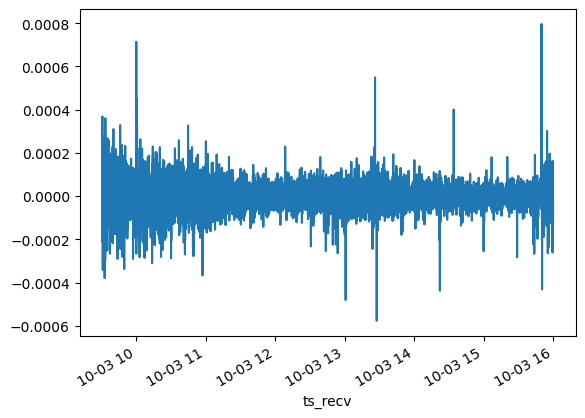

In [16]:
mean_mid_price_variations = all_data["mean_mid_price_variation"]
mean_mid_price_variations.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(mean_mid_price_variations)

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# Interpretation
if adf_result[1] < 0.05:
    print("The series is stationary (reject the null hypothesis).")
else:
    print("The series is not stationary (fail to reject the null hypothesis).")

ADF Statistic: -51.37864646362376
p-value: 0.0
Critical Values:
   1%: -3.430811670449778
   5%: -2.8617440374859218
   10%: -2.5668786043818512
The series is stationary (reject the null hypothesis).
